In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re 
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))

from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn import metrics

In [5]:
data = pd.read_csv('IMDB Dataset.csv')

print(data.head())

print('-----------------')

print(data.shape)

print('-----------------')

print(data.info())



                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
-----------------
(50000, 2)
-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


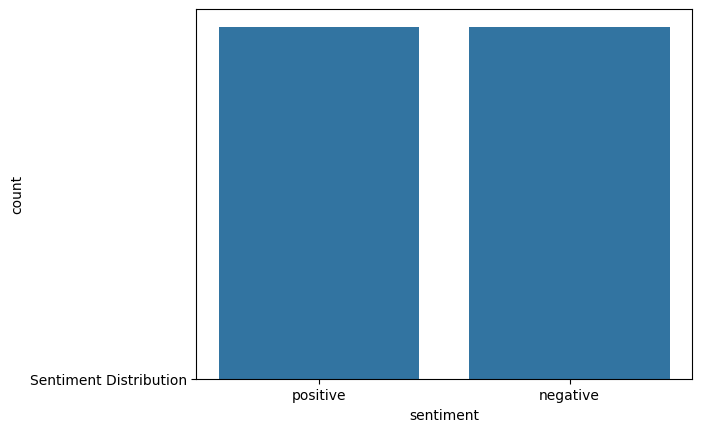

In [6]:
#Visulaliation 

sns.countplot(data=data,x='sentiment')
plt.plot('Sentiment Distribution')


In [7]:
for i in range(3):
    print("Review :" , i)
    print(data['review'][i])
    print("Sentiment:",data['sentiment'][i])
    print()

Review : 0
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due

In [8]:
def no_of_words(text):
    words = text.split()
    return len(words)

In [31]:
data['word_count'] = data['review'].apply(no_of_words)
data.sentiment.replace("positive",1,inplace=True)
data.sentiment.replace("negative",0,inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_24584\674684218.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.sentiment.replace("positive",1,inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_24584\674684218.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [10]:
data.head()

,review,sentiment,word_count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [11]:
def preprocesing(text):
    text= text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    words = text.split()
    words = [ word for word in words if word not in stopwords]

    stemmer = PorterStemmer()
    stems = [stemmer.stem(word) for word in words]    

    return " ".join(stems)

In [12]:
data['review'] = data['review'].apply(preprocesing)

In [13]:
data = data.drop_duplicates('review')

In [15]:
X = data['review']
Y = data['sentiment']

In [16]:
vect = TfidfVectorizer()
X = vect.fit_transform(data['review'])

In [18]:
import pickle

# save the model
# with open('tfidf.pkl','wb') as f:
#     pickle.dump(vect,f)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

In [20]:
# Using Logistic regression 

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
logreg_pred = logreg.predict(X_test)

print("accuracy Score: ",metrics.accuracy_score(logreg_pred,y_test))

accuracy Score:  0.8862538964610965


In [21]:
import pickle

# # # save the model
# # with open('logreg.pkl','wb') as f:
# #     pickle.dump(logreg,f)

# #load the model 
# with open('logreg.pkl','rb') as f:
#     logreg2 = pickle.load(f)


# pred = logreg2.predict(X_test)
# print("Accuracy Score: ", metrics.accuracy_score(pred,y_test))


In [22]:
# Using Support Vector Machine

from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
print("Accuracy score: ",metrics.accuracy_score(svc_pred,y_test))

Accuracy score:  0.8880875252123953


In [23]:
# Using Naive Bayes 

from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train,y_train)
mnb_pred = mnb.predict(X_test)
print("Accuaracy Score: ",metrics.accuracy_score(mnb_pred,y_test))

Accuaracy Score:  0.8570991993154453


In [24]:
def testResult(text):
    text = preprocesing(text)
    transformed_text =  vect.transform([text])
    return svc.predict(transformed_text)[0]

In [25]:
# Custom Example 


r1 =  "This film was a rollercoaster of emotions, with brilliant performances and a gripping storyline. However, the ending left me feeling unsatisfied and confused."
r2 = "plot was convoluted and hard to follow. It felt like the director was trying too hard to be artistic"


print(testResult(r1))
print(testResult(r2))

1
0


In [30]:
from review_test import predictReview

svm = pickle.load(open('svc.pkl','rb'))
tfidf = pickle.load(open('tfidf.pkl','rb'))


r1 =  "This film was a rollercoaster of emotions, with brilliant performances and a gripping storyline. However, the ending left me feeling unsatisfied and confused."

predictReview(r1)

'Positive'